## Check completeness of GAMA against KiDS

In [1]:
from astropy.io import fits
from astropy.table import Table, hstack

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 24,
    'font.serif': 'Georgia',
    'axes.labelsize': 'large',
    'mathtext.fontset': 'stix',
    'axes.linewidth': 1.5,
    'xtick.direction': 'in',
    'ytick.direction': 'in'
})

In [2]:
#Load in KiDS data
with fits.open('/data2/lsajkov/mpdg/data_products/KiDS/KiDS_SOM_catalog_15Jul24.fits') as cat:
    KiDS_cat = Table(cat[1].data)

#Load in GAMA data
with fits.open('/data2/lsajkov/mpdg/data_products/GAMA/GAMA_SOM_training_catalog_15Jul24.fits') as cat:
    GAMA_cat = Table(cat[1].data)

#Load in DESI data
with fits.open('/data2/lsajkov/mpdg/data_products/DESI/DESI_SOM_catalog_11Jul24.fits') as cat:
    DESI_cat = Table(cat[1].data)

In [9]:
KiDS_hist_vals, bins = np.histogram(KiDS_cat['r_mag'], bins = 'auto')
GAMA_hist_vals, _    = np.histogram(GAMA_cat['r_mag'], bins = bins)

In [24]:
KiDS_cumulative = np.array([np.sum(KiDS_hist_vals[i:]) for i in range(len(bins) - 1)], dtype = np.float64)
KiDS_cumulative /= np.max(KiDS_cumulative)

GAMA_cumulative = np.array([np.sum(GAMA_hist_vals[i:]) for i in range(len(bins) - 1)], dtype = np.float64)
GAMA_cumulative /= np.max(GAMA_cumulative)

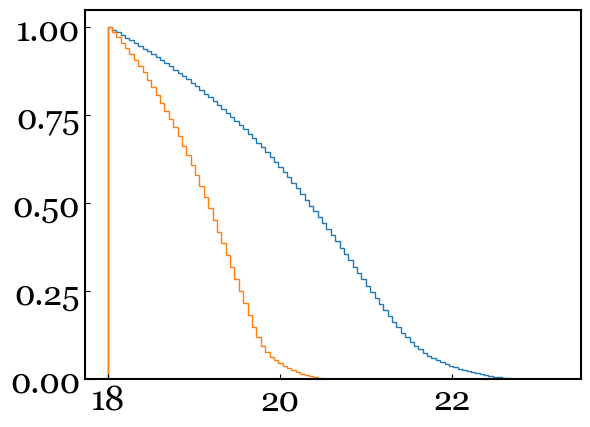

In [26]:
plt.stairs(KiDS_cumulative, bins)
plt.stairs(GAMA_cumulative, bins)

<>:6: SyntaxWarning: invalid escape sequence '\m'
<>:6: SyntaxWarning: invalid escape sequence '\m'
/var/tmp/lsajkov/ipykernel_2362323/3965685353.py:6: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('$\mathcal{N}_{GAMA}$/$\mathcal{N}_{KiDS}$')


Text(0, 0.5, '$\\mathcal{N}_{GAMA}$/$\\mathcal{N}_{KiDS}$')

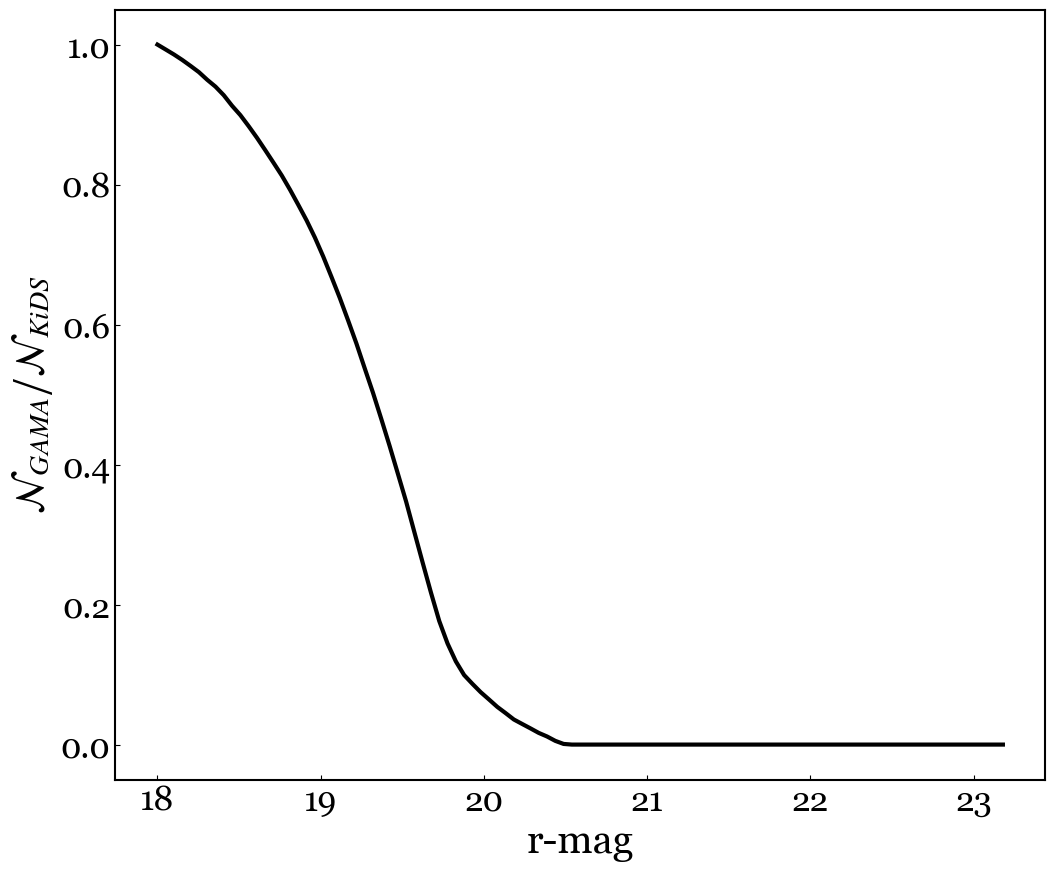

In [31]:
fig = plt.figure(figsize = (12, 10))
ax = fig.add_subplot()

ax.plot(bins[:-1], GAMA_cumulative/KiDS_cumulative, color = 'black', linewidth = 3)
ax.set_xlabel('r-mag')
ax.set_ylabel('$\mathcal{N}_{GAMA}$/$\mathcal{N}_{KiDS}$')